In [ ]:
from google.colab import files
upload = files.upload()

Saving Data file.csv to Data file.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None) # setting maximum columns lenght, it will show all the columns in the dataset
import re
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

In [ ]:
# loading data from local drive by using pandas read_csv method
Micro_credit_ds = pd.read_csv("Data file.csv") 

# checking 10 sample observations from the data
Micro_credit_ds.sample(5)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
126684,126685,1,69746I70788,415.0,42.765333,42.765333,1254.54,1254.54,10.0,0.0,770,4,4.0,5387.0,1539.0,213.00,5,14,6934,1539.0,223.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-06-29
63225,63226,1,40578I89237,359.0,2464.520000,2478.800000,2678.39,2678.39,13.0,0.0,1539,1,0.0,1539.0,1539.0,26.80,2,70,3472,1736.0,92.80,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.0,0.0,UPW,2016-07-18
142538,142539,1,89155I95204,126.0,3012.991333,3023.170000,1488.79,1641.19,8.0,0.0,1539,3,3.0,4617.0,1539.0,54.33,5,9,9349,1539.0,54.33,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.0,0.0,UPW,2016-07-08
187429,187430,0,04187I91190,333.0,11.200000,11.200000,42.00,42.00,57.0,0.0,773,0,0.0,0.0,0.0,0.00,1,0,773,773.0,5.00,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,2016-06-21
5046,5047,1,98469I90849,806.0,5850.000000,5850.000000,597.36,910.56,1.0,0.0,770,6,15.0,4620.0,770.0,33.80,6,15,4620,770.0,33.80,0.0,0.0,0,0,6,36,6.0,0.0,6.0,36,6,0.0,22.0,22.0,UPW,2016-08-08


**Observations**<br>
We have two index columns, one is generated by pandas and another one it has from datafile itself.
we can observe index which is generated by  pandas and another one from data itself are same. The difference which we have
observed is that pandas's index starts from 0 and another one starts from 1. we will keep pandas index as python's index starts from 0 and we will drop another one by using pandas drop method

In [ ]:
# we are dropping unnamed column, it is the name of data index column name in the file
Micro_credit_ds.drop("Unnamed: 0",axis =1 , inplace = True)

In [ ]:
# checking the top 5 observations by using pandas head method
Micro_credit_ds.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [ ]:
Micro_credit_ds.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


**Observations**<br>
1.There is no missing values as mentioned in the process document  
2. we can see that each columns have outlier present
3. columns like aon,daily_decr30, daily_decr90, rental30, rental90, last_rech_date_ma, last_rech_date_da, medianmarechprebal30, medianmarechprebal90 have negative values but by nature they cannot be negative, i will check and treat them
4. Couple of columns like cnt_da_rech30, fr_da_rech30, cnt_da_rech90, fr_da_rech90, medianamnt_loans30, medianamnt_loans90,last_rech_date_da, have lot of zero values, i will check and treat them also
5. we have string in mobile number 



In [ ]:
# lets check the columns details by using the pandas info method
Micro_credit_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

We have categorical features which are pdate,MSISDN and pcircle and all other are numeric in nature.

In [ ]:
# Checking zeros in the features, how many % zeros are there in each features and printing %
""" As i have already identified the features name, lets check the zeros %, if zeros proportion will high, we will delete
 those columns becuase those will not add any values  in the prediciton """

# cnt_da_rech30, fr_da_rech30, cnt_da_rech90, fr_da_rech90, medianamnt_loans30, medianamnt_loans90,last_rech_date_da,

print("% of values above zeros in cnt_da_rech30 : - ", Micro_credit_ds[Micro_credit_ds["cnt_da_rech30"]> 0].shape[0]/len(Micro_credit_ds)*100)
print("% of values above zeros in fr_da_rech30 : - ", Micro_credit_ds[Micro_credit_ds["fr_da_rech30"]> 0].shape[0]/len(Micro_credit_ds)*100)
print("% of values above zeros in cnt_da_rech90 : - ", Micro_credit_ds[Micro_credit_ds["cnt_da_rech90"]> 0].shape[0]/len(Micro_credit_ds)*100)
print("% of values above zeros in fr_da_rech90 : - ", Micro_credit_ds[Micro_credit_ds["fr_da_rech90"]> 0].shape[0]/len(Micro_credit_ds)*100)
print("% of values above zeros in medianamnt_loans30 : - ", Micro_credit_ds[Micro_credit_ds["medianamnt_loans30"]> 0].shape[0]/len(Micro_credit_ds)*100)
print("% of values above zeros in medianamnt_loans90 : - ", Micro_credit_ds[Micro_credit_ds["medianamnt_loans90"]> 0].shape[0]/len(Micro_credit_ds)*100)
print("% of values above zeros in last_rech_date_da : - ", Micro_credit_ds[Micro_credit_ds["last_rech_date_da"]> 0].shape[0]/len(Micro_credit_ds)*100)


% of values above zeros in cnt_da_rech30 : -  1.9628518127990915
% of values above zeros in fr_da_rech30 : -  0.7533648547422863
% of values above zeros in cnt_da_rech90 : -  2.560677121850443
% of values above zeros in fr_da_rech90 : -  0.4127046227688902
% of values above zeros in medianamnt_loans30 : -  6.750225436918218
% of values above zeros in medianamnt_loans90 : -  5.806014513843497
% of values above zeros in last_rech_date_da : -  3.205259717643242


We can see that these columns have hardly a few % of values above zeros, in simple word in each columns we can above 90% values are zero, so these features will not add any value in the prediction. i am dropping them

In [ ]:
# Dropping above features
# cnt_da_rech30, fr_da_rech30, cnt_da_rech90, fr_da_rech90, medianamnt_loans30, medianamnt_loans90,last_rech_date_da,

Micro_credit_ds.drop(["cnt_da_rech30", "fr_da_rech30", "cnt_da_rech90", "fr_da_rech90", "medianamnt_loans30", "medianamnt_loans90","last_rech_date_da"],axis = 1, inplace = True)


In [ ]:
# we have string charactor in the mobile number,it should not be present in the mobile number so removing the char from it. 
number = []
for i in Micro_credit_ds["msisdn"]:
    num = re.findall("\d+",i)
    number.append(num[0]+num[1])
  

In [ ]:
# Adding the corrected feature in the dataset and removing the old one

Micro_credit_ds.insert(1,"MSISDN",number)

# Removing old feature
Micro_credit_ds.drop("msisdn",axis =1, inplace = True)

As i have already mentioned that we have string charactor in the mobile number feature, idealy it should not be present in the feature so removing the char from it.
i have used re library to remove it and saving it in another variable as list, that variable i have inserted the same variable 
in the dataset and removed the old variable from it. 

# Outlier and distribution check
As i have already seen that data is not normally distributed and it has lot of outlier values. i will random feature not all.

In [ ]:
# Creating method to check distribution and outlier by using seaborn library

def check_distribution_outlier(df,variable):
#     distribution plot

    plt.figure(figsize = (15,5))
    plt.subplot(121)
    sns.distplot(df[variable])
    
#     boxplot method

    plt.subplot(122)
    sns.boxplot(df[variable])    

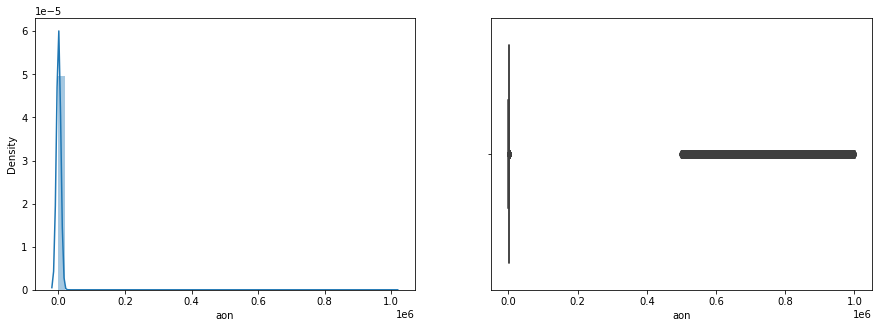

In [ ]:
check_distribution_outlier(Micro_credit_ds,"aon")

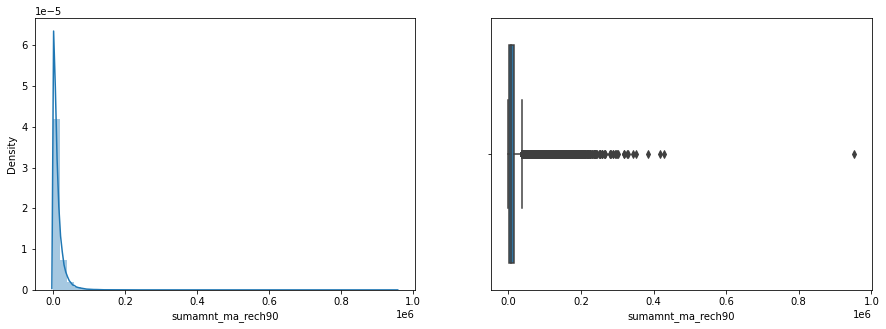

In [ ]:
check_distribution_outlier(Micro_credit_ds,"sumamnt_ma_rech90")

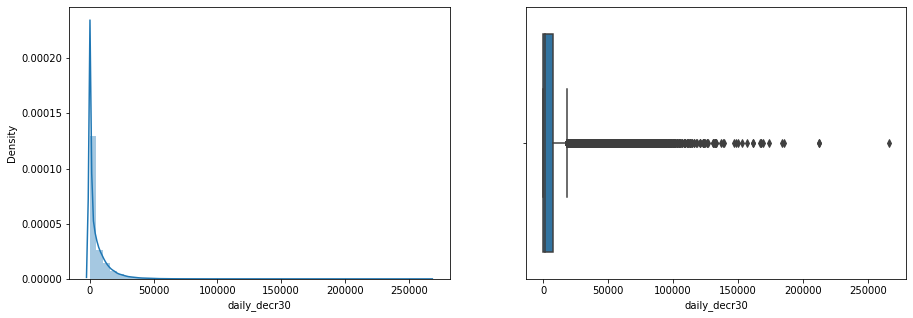

In [ ]:
check_distribution_outlier(Micro_credit_ds,"daily_decr30")

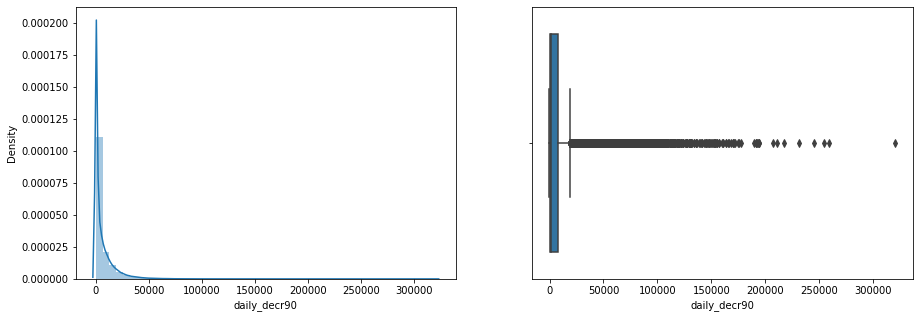

In [ ]:
check_distribution_outlier(Micro_credit_ds,"daily_decr90")

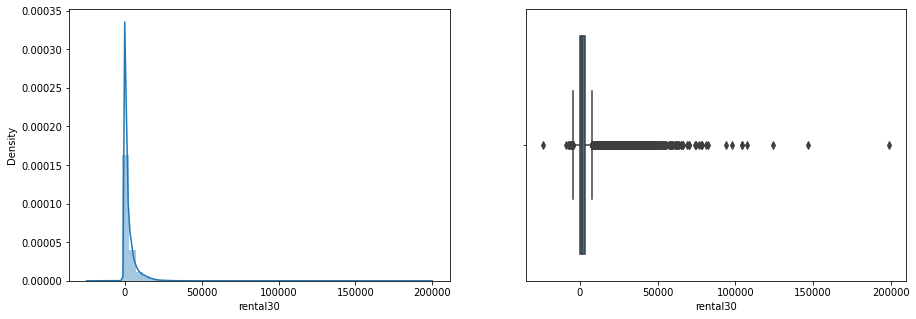

In [ ]:
check_distribution_outlier(Micro_credit_ds,"rental30")

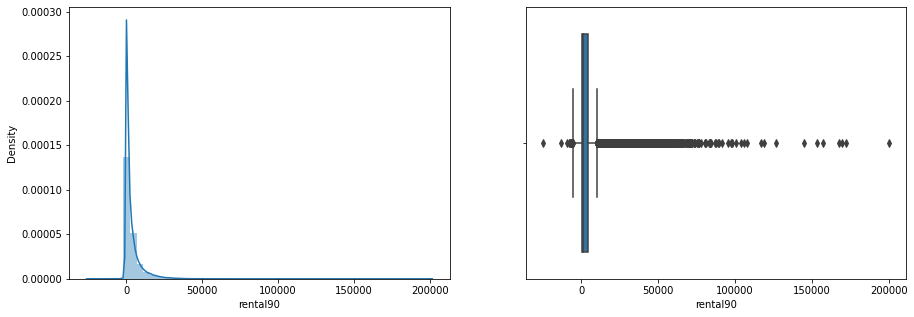

In [ ]:
check_distribution_outlier(Micro_credit_ds,"rental90")

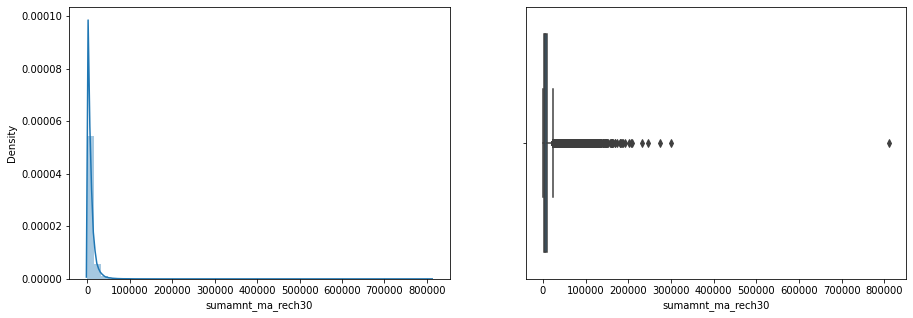

In [ ]:
check_distribution_outlier(Micro_credit_ds,"sumamnt_ma_rech30")

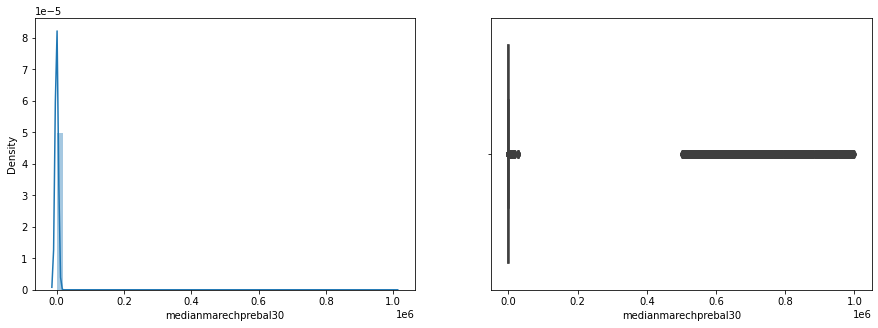

In [ ]:
check_distribution_outlier(Micro_credit_ds,"medianmarechprebal30")

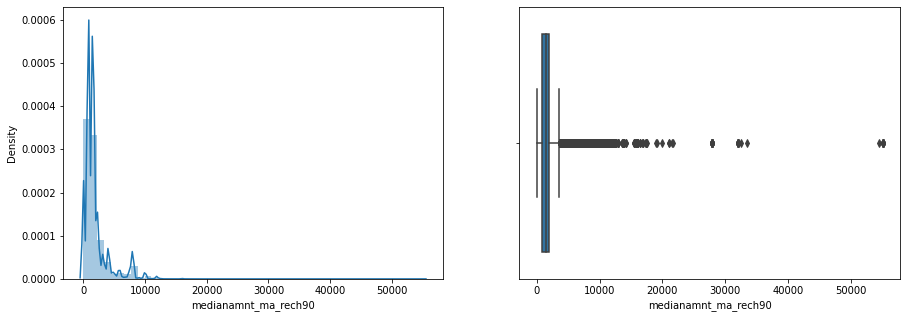

In [ ]:
check_distribution_outlier(Micro_credit_ds,"medianamnt_ma_rech90")

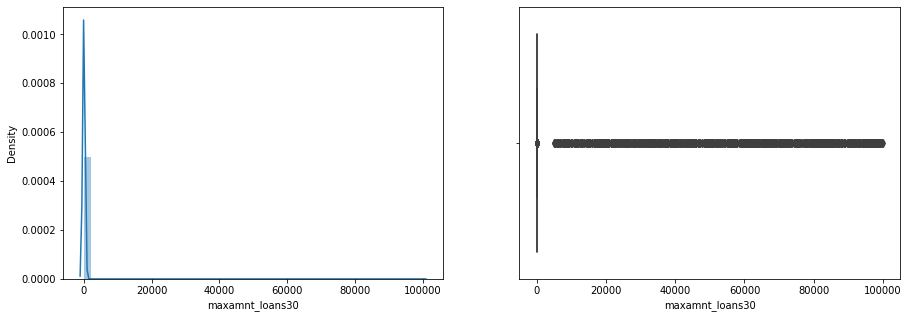

In [ ]:
check_distribution_outlier(Micro_credit_ds,"maxamnt_loans30")

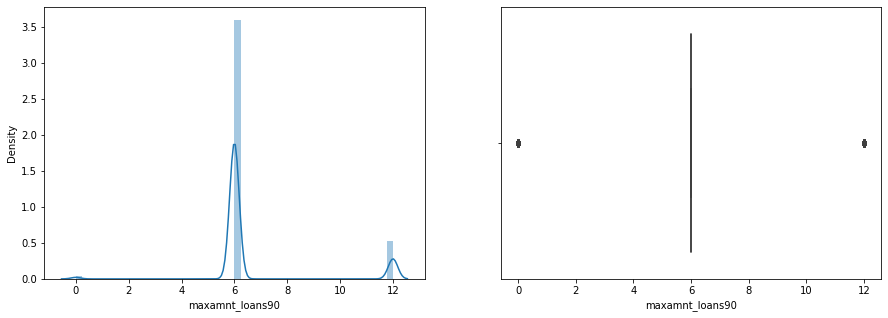

In [ ]:
check_distribution_outlier(Micro_credit_ds,"maxamnt_loans90")

As i mentioned in my previous observation that i  would check distribution and outlier in a few random columns. all are have outlier, 
i have already checked from the describe method that almost each columns have outlier.so i will treat them. will try to remove them first and see how many observations we are lossing. if it would be high we wont delete observation rather we would bound them with upper and lower limit by using IQR method 

# Removing outlier by using Zscore

In [ ]:
# importing library
from scipy.stats import zscore

# creating a dummy data to check how many observation are being deleted

dummy_data = Micro_credit_ds.drop(["MSISDN","pcircle","pdate"],axis = 1).copy()

# appying zscore

z_score = np.abs(zscore(dummy_data))

# removing value which are greather then 3
dummy_data = dummy_data[(z_score < 3).all(axis =1)]

print("Before outlier removal" ,Micro_credit_ds.shape)
print("After outlier removal" ,dummy_data.shape)

Before outlier removal (209593, 29)
After outlier removal (171224, 26)


I have used zscore to remove the outlier, earlier we had **209593** observations after removing the outlier, it has come to **171244**.
we are lossing **38369** observations from data which is **18%** of overall data and it is huge amount of information loss. we cannot afford to lose such high data points so we will not remove it rather we will bound them by using IQR method.
i will treat each feature one by one and check them through visualization.

# Outlier correction by using IQR

In [ ]:
# Creating method to bound the outlier,

""" it will take dataframe and variable and bound the outlier with upper and lower limit
    it will also plot distribution and boxplot graph so that we the status.
"""
def outlier_capping_IQR(df,variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    
    IQR = Q3-Q1
    
    Upper_limit = Q3 +(1.5*IQR)
    lower_limit = Q1-(1.5*IQR)
    print(f"upper_limit {Upper_limit} and lower_limit {lower_limit}")
    df[variable] = np.where(df[variable]> Upper_limit, Upper_limit, np.where(df[variable] <lower_limit, lower_limit, df[variable])) 
    
#     method will populate graph

    plt.figure(figsize =(20,6))
    plt.subplot(121)
    sns.distplot(df[variable])
    
    # boxplot
    
    plt.subplot(122)
    sns.boxplot(df[variable])

    

upper_limit 2086.0 and lower_limit -858.0


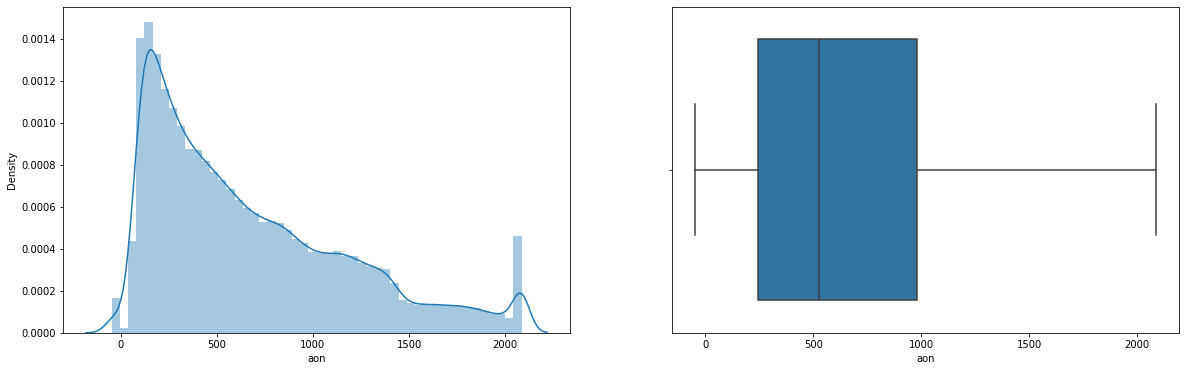

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"aon")

upper_limit 18046.34 and lower_limit -10759.9


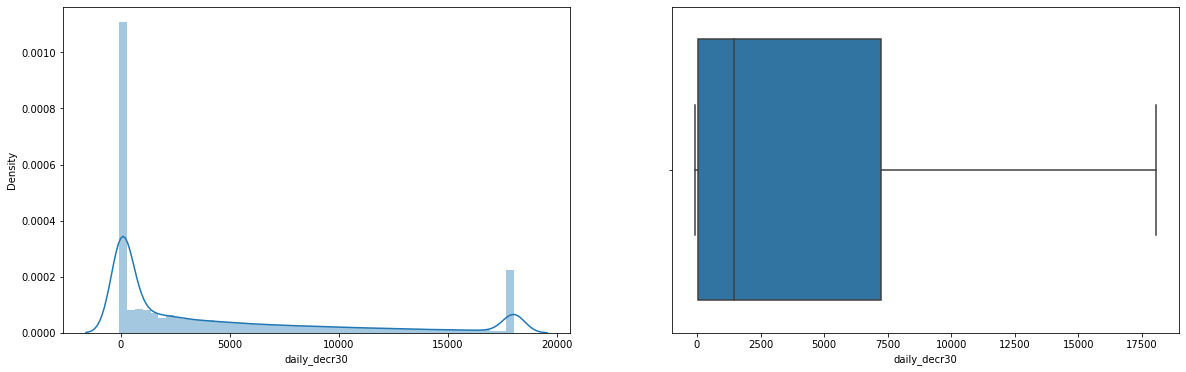

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"daily_decr30")

upper_limit 19442.937000000027 and lower_limit -11597.455000000016


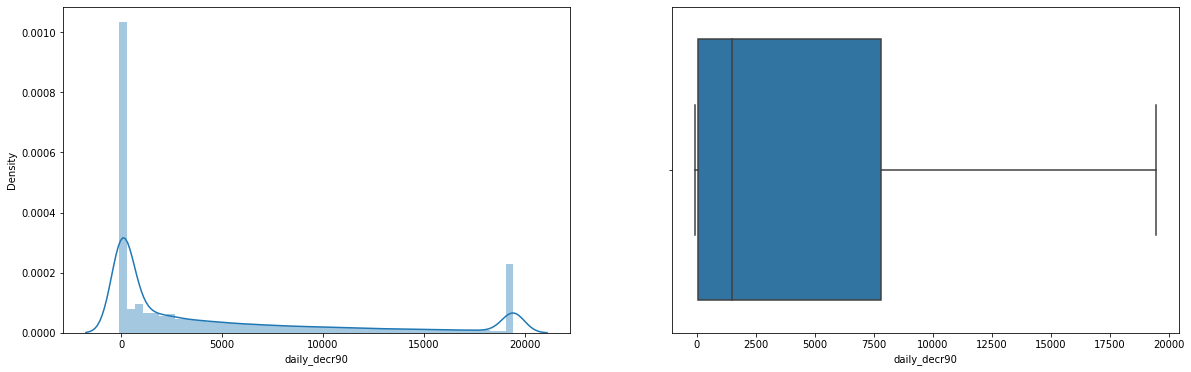

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"daily_decr90")

upper_limit 7971.719999999999 and lower_limit -4334.36


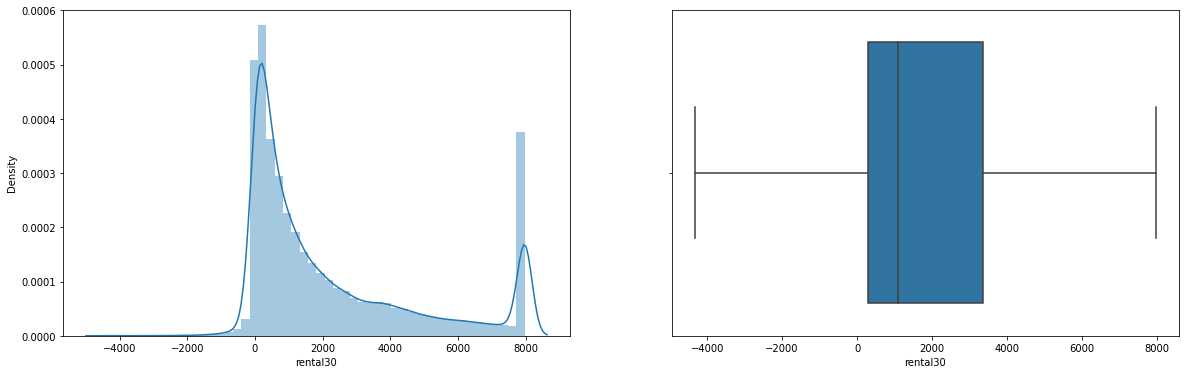

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"rental30")

upper_limit 10054.085 and lower_limit -5552.035


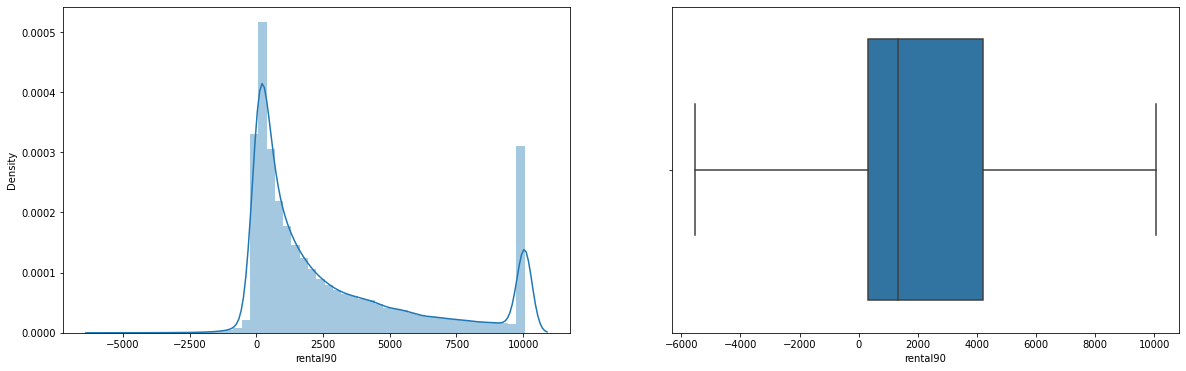

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"rental90")

upper_limit 16.0 and lower_limit -8.0


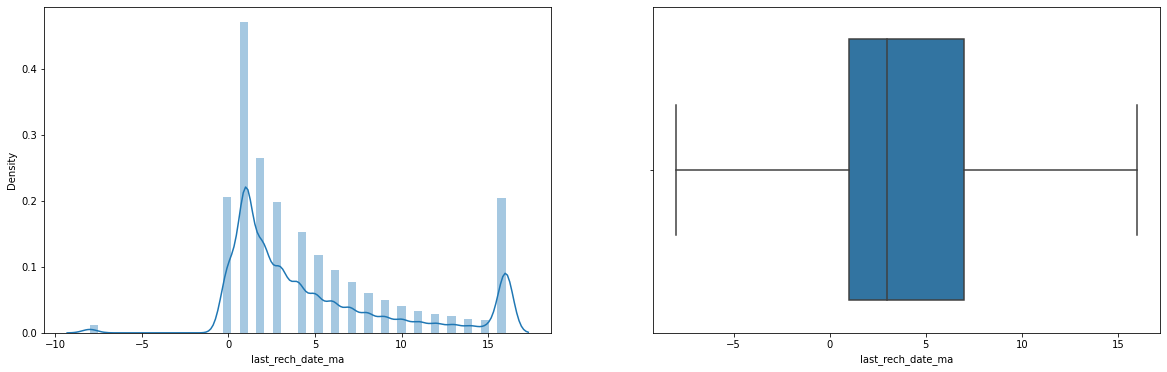

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"last_rech_date_ma")

upper_limit 4617.5 and lower_limit -1538.5


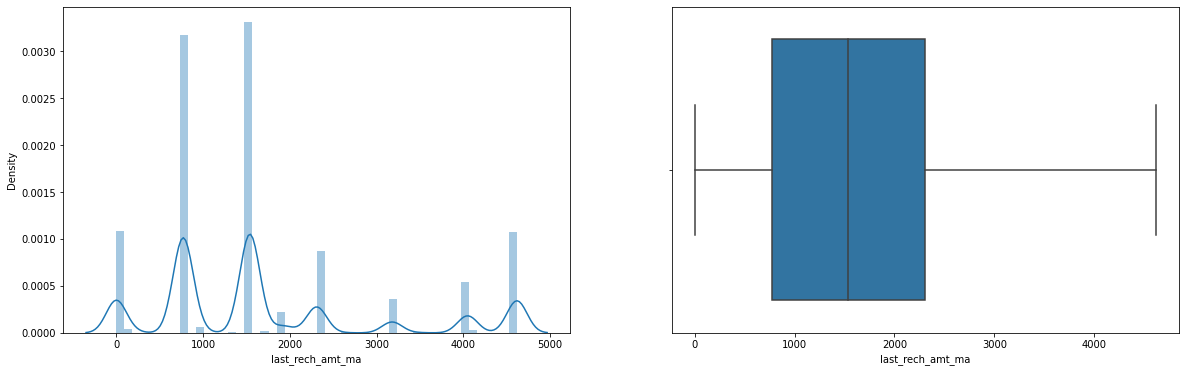

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"last_rech_amt_ma")

upper_limit 11.0 and lower_limit -5.0


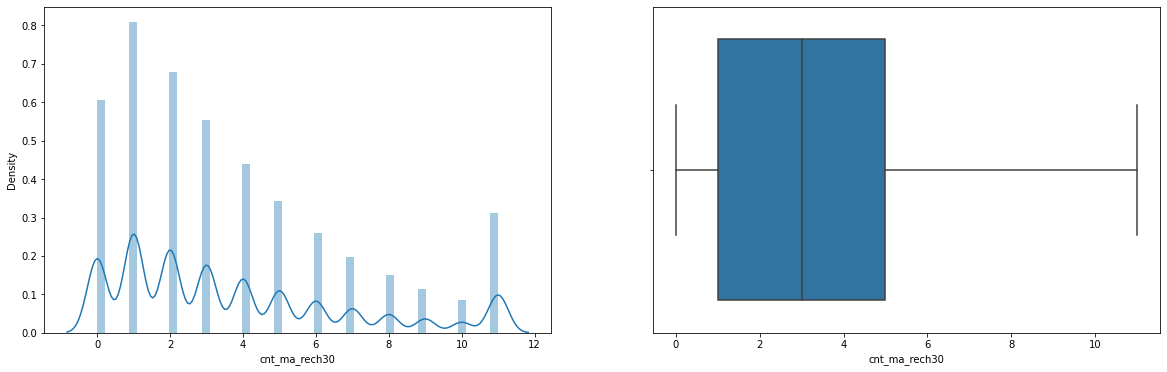

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"cnt_ma_rech30")

upper_limit 15.0 and lower_limit -9.0


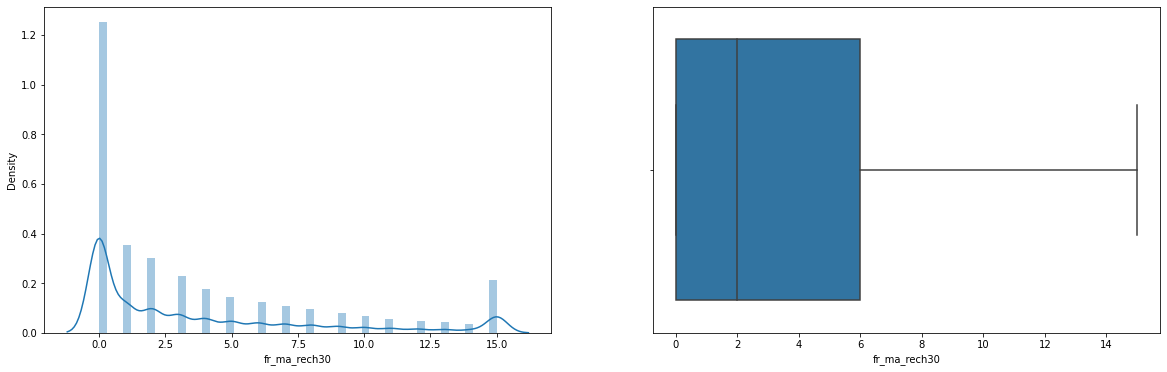

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"fr_ma_rech30")

upper_limit 22715.0 and lower_limit -11165.0


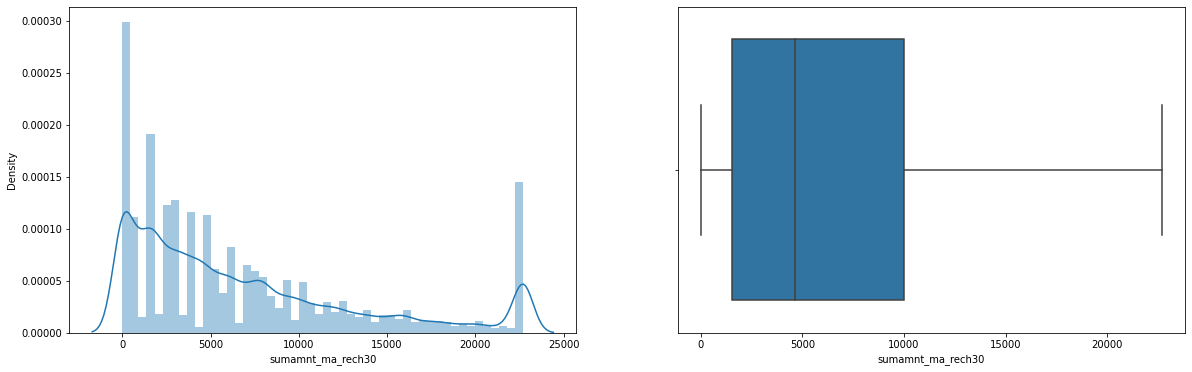

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"sumamnt_ma_rech30")

upper_limit 3655.0 and lower_limit -961.0


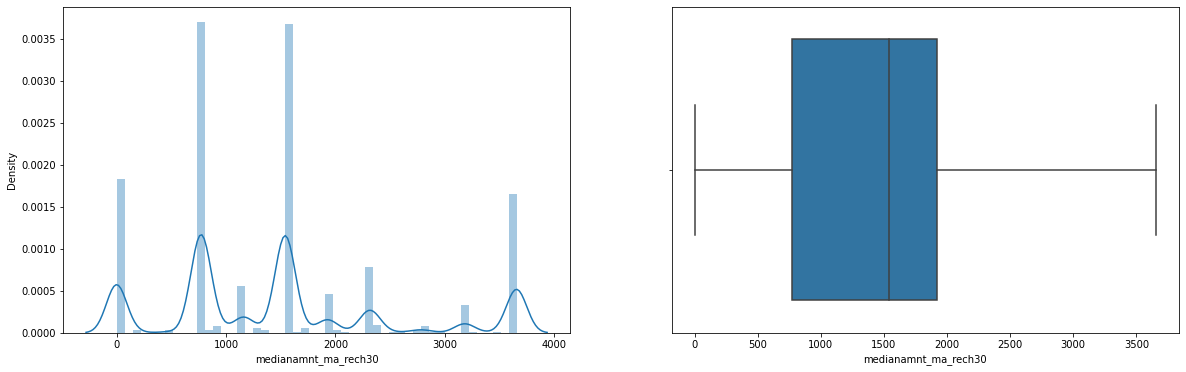

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"medianamnt_ma_rech30")

upper_limit 191.0 and lower_limit -97.0


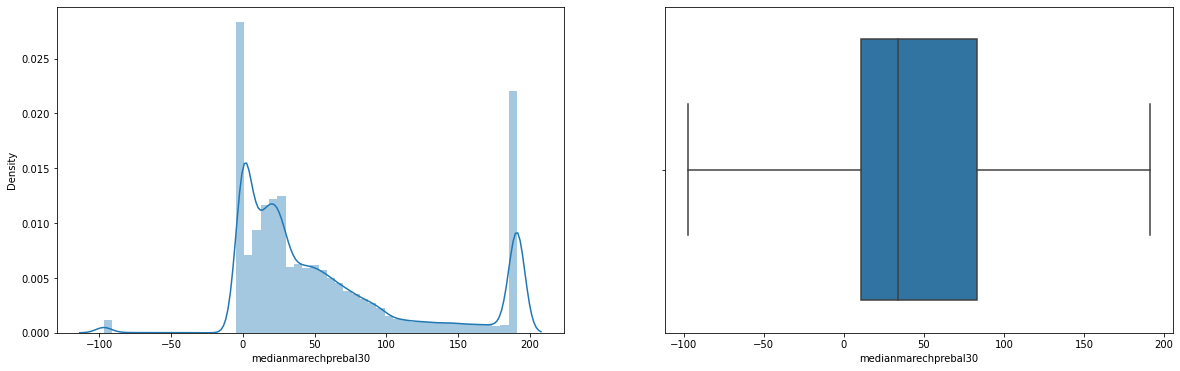

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"medianmarechprebal30")

upper_limit 17.0 and lower_limit -7.0


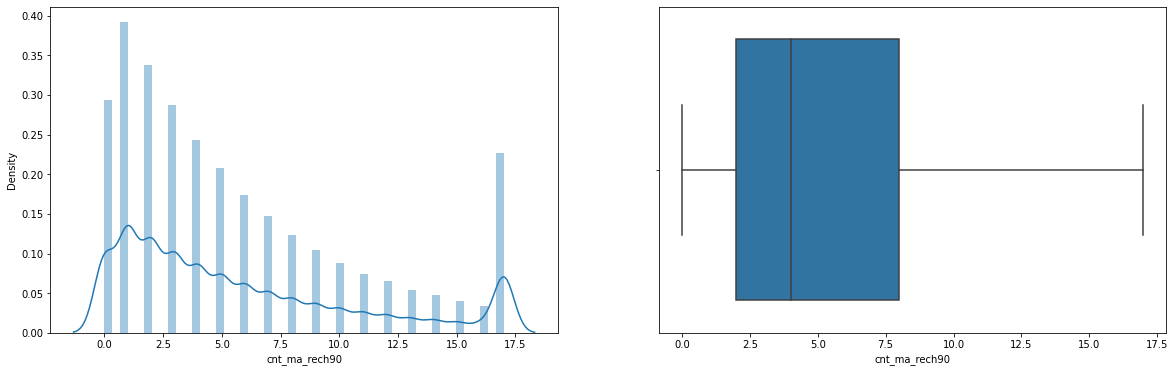

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"cnt_ma_rech90")

upper_limit 20.0 and lower_limit -12.0


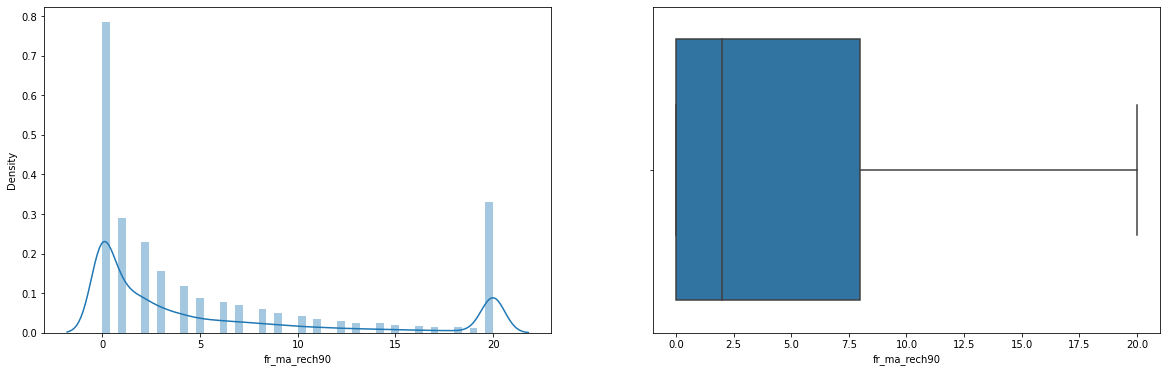

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"fr_ma_rech90")

upper_limit 36524.5 and lower_limit -18207.5


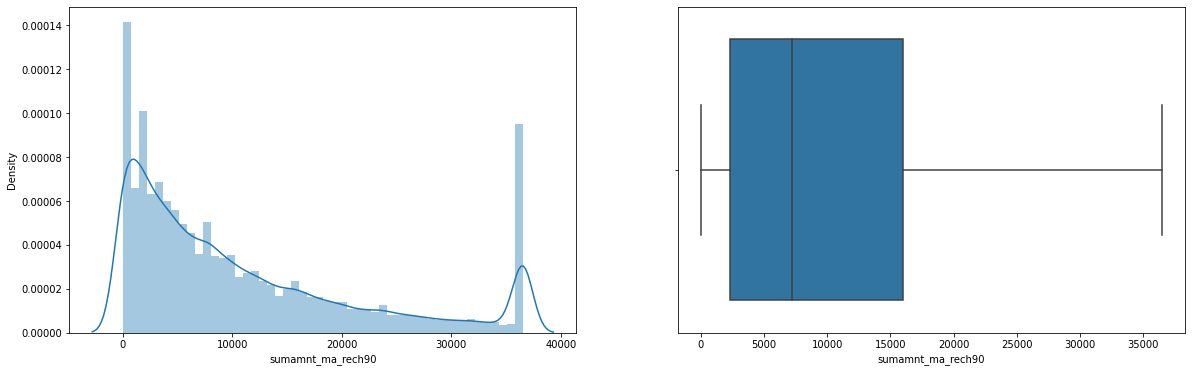

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"sumamnt_ma_rech90")

upper_limit 3650.5 and lower_limit -953.5


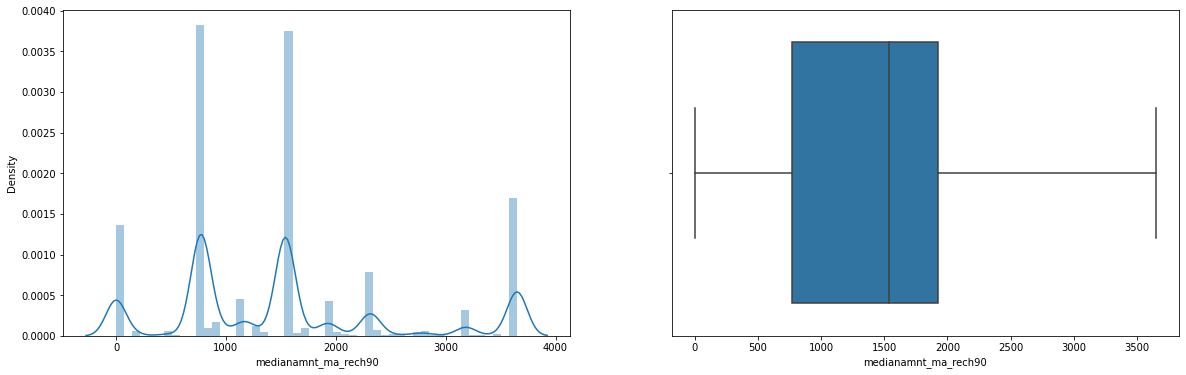

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"medianamnt_ma_rech90")

upper_limit 176.37500000000034 and lower_limit -82.46500000000003


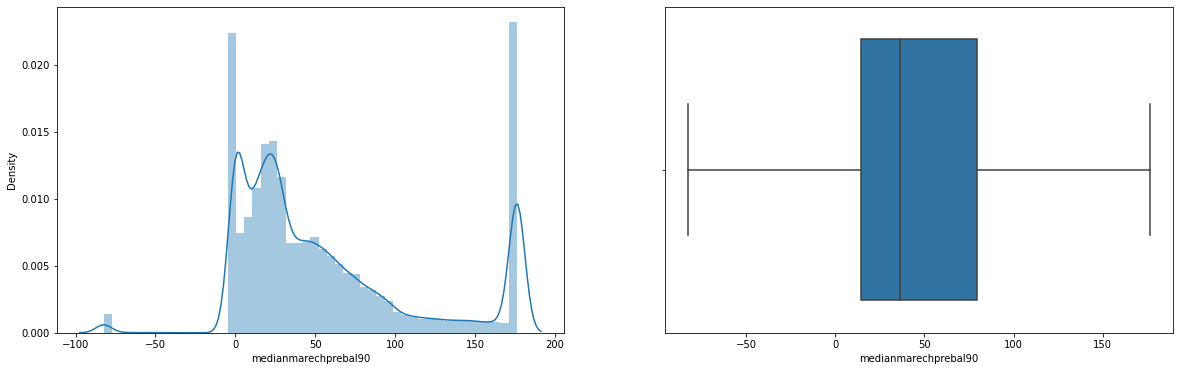

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"medianmarechprebal90")

upper_limit 8.5 and lower_limit -3.5


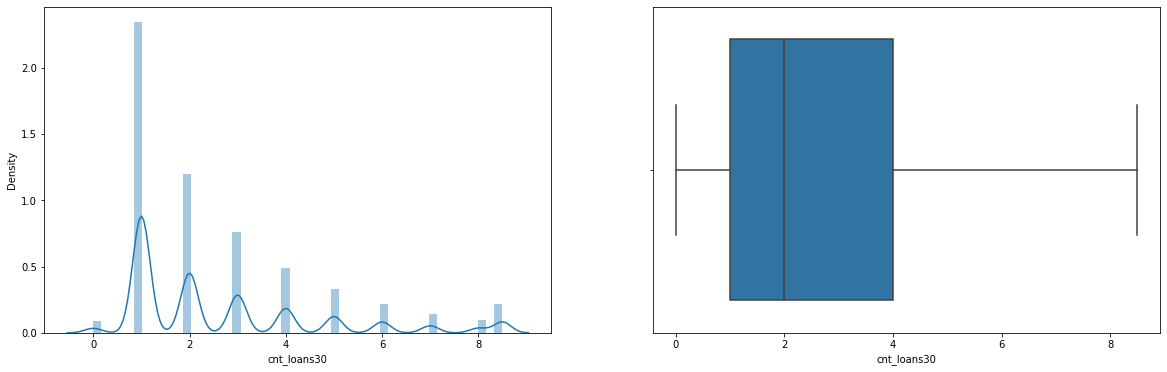

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"cnt_loans30")

upper_limit 51.0 and lower_limit -21.0


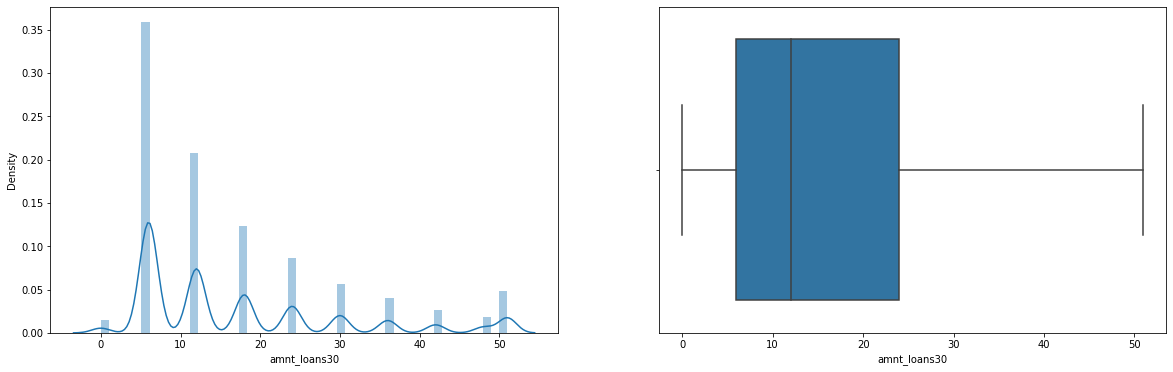

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"amnt_loans30")

upper_limit 6.0 and lower_limit 6.0


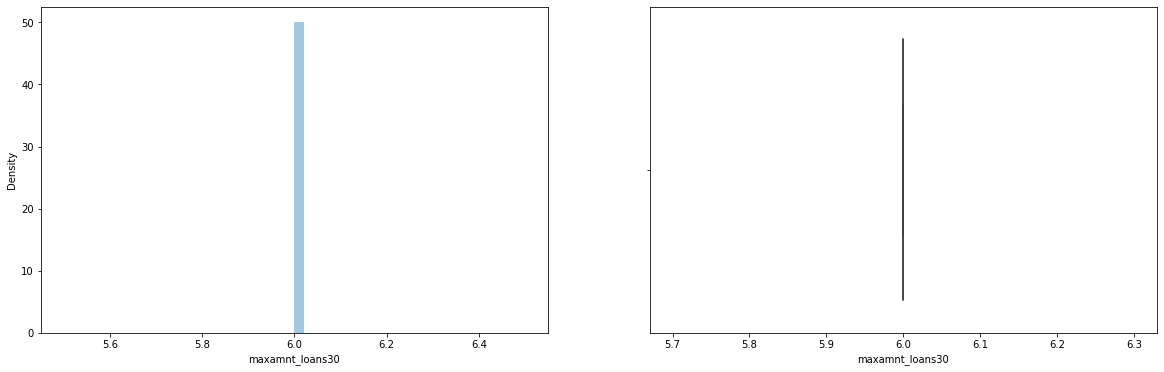

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"maxamnt_loans30")

upper_limit 11.0 and lower_limit -5.0


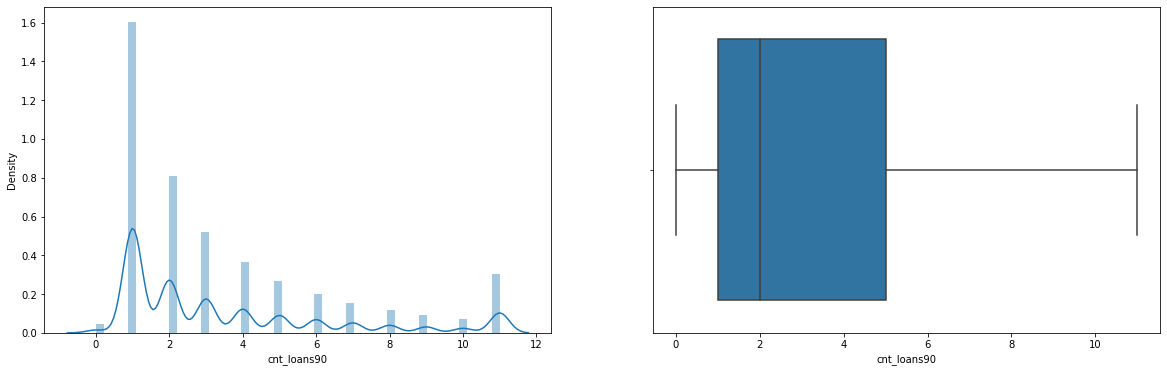

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"cnt_loans90")

upper_limit 66.0 and lower_limit -30.0


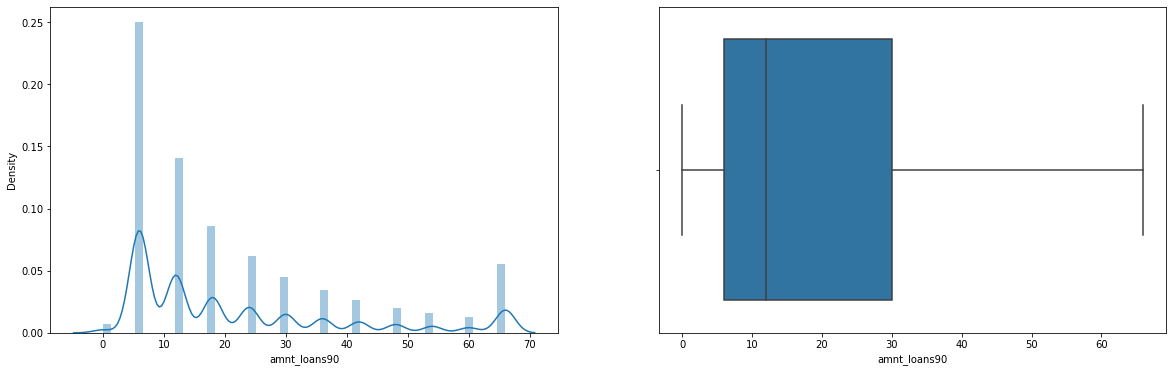

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"amnt_loans90")

upper_limit 9.375 and lower_limit -5.625


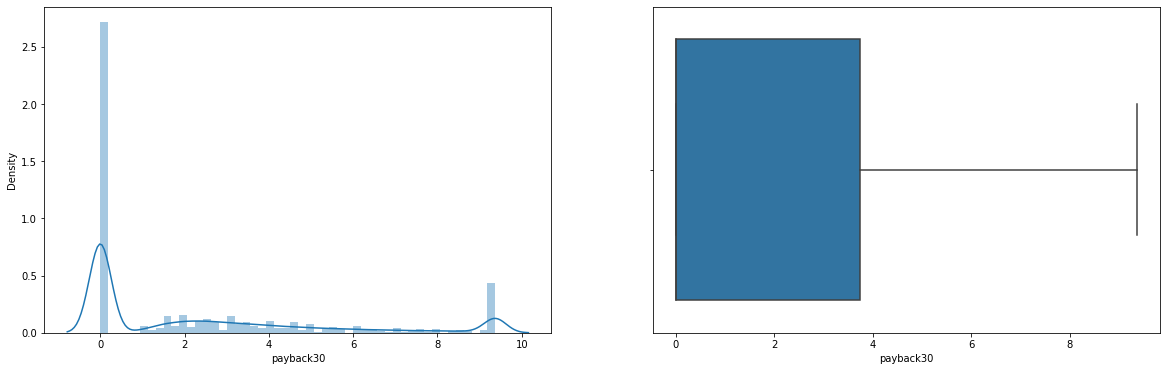

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"payback30")

upper_limit 11.25 and lower_limit -6.75


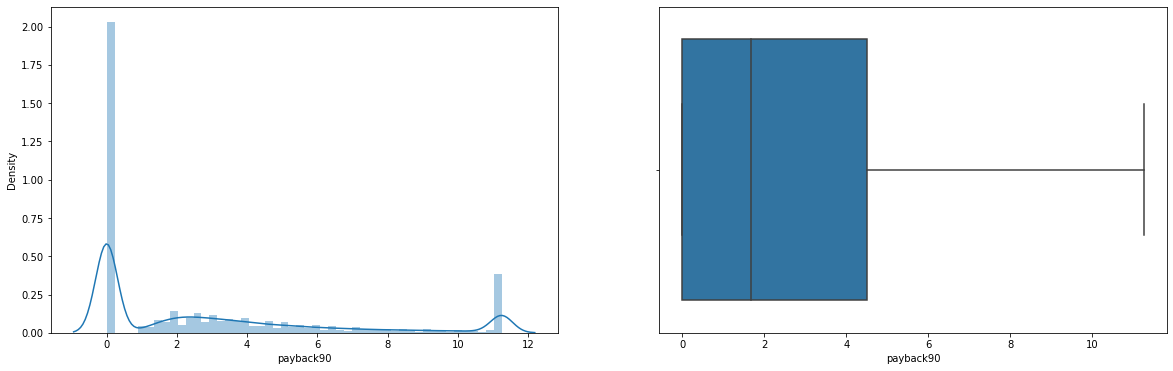

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"payback90")

upper_limit 6.0 and lower_limit 6.0


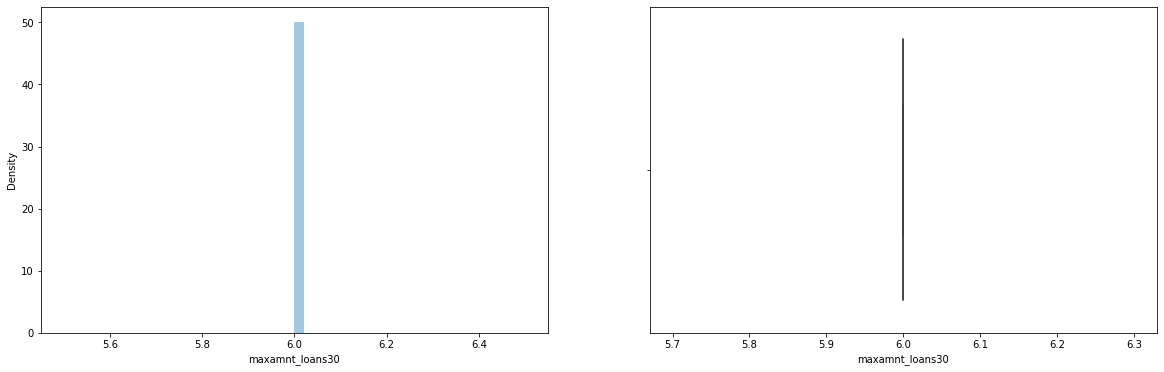

In [ ]:
outlier_capping_IQR(Micro_credit_ds,"maxamnt_loans30")

In [ ]:
Micro_credit_ds.head()

,label,MSISDN,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pcircle,pdate
0,0,2140870789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539.0,2.0,15.0,3078.0,1539.0,7.50,2.0,20.0,3078.0,1539.0,7.50,2.0,12.0,6.0,2.0,12.0,6,9.375000,11.250000,UPW,2016-07-20
1,1,7646270374,712.0,12122.000000,12124.750000,3691.26,3691.26,16.0,4617.5,1.0,0.0,5787.0,3655.0,61.04,1.0,0.0,5787.0,3650.5,61.04,1.0,12.0,6.0,1.0,12.0,12,0.000000,0.000000,UPW,2016-08-10
2,1,1794370372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539.0,1.0,0.0,1539.0,1539.0,66.32,1.0,0.0,1539.0,1539.0,66.32,1.0,6.0,6.0,1.0,6.0,6,0.000000,0.000000,UPW,2016-08-19
3,1,5577370781,241.0,21.228000,21.228000,159.42,159.42,16.0,947.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,947.0,947.0,2.50,2.0,12.0,6.0,2.0,12.0,6,0.000000,0.000000,UPW,2016-06-06
4,1,0381382730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309.0,7.0,2.0,20029.0,2309.0,29.00,8.0,2.0,23496.0,2888.0,35.00,7.0,42.0,6.0,7.0,42.0,6,2.333333,2.333333,UPW,2016-06-22


Since outlier has been corrected, data looks good now but we have still some issue in the data and that is nagetive values.Features which have nagetive values ideally they should not have any negative values. we will replace nagetie values with median as it is not impacted by outlier although we hve treated outlier. 

In [ ]:
Micro_credit_ds.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,668.405825,4468.105346,4855.261718,2197.069184,2769.147968,4.837991,1719.109131,3.683081,3.672041,6861.071877,1475.941906,58.219786,5.709642,5.547490,10878.720344,1517.062192,55.956072,2.641856,16.862223,6.0,3.448989,21.423320,6.703134,2.299777,2.894150
std,0.330519,514.130937,5859.401770,6438.219389,2552.708718,3251.352605,5.071356,1345.846661,3.199040,4.608388,6612.799020,1079.392998,64.544132,5.089343,6.965523,10789.012367,1056.056717,57.799928,2.089075,13.238181,0.0,3.025185,18.506542,2.103864,3.030659,3.632511
min,0.000000,-48.000000,-93.012667,-93.012667,-4334.360000,-5552.035000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.000000,0.000000,0.000000,0.000000,0.000000,-82.465000,0.000000,0.000000,6.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.000000,0.000000,2317.000000,773.000000,14.600000,1.000000,6.000000,6.0,1.000000,6.000000,6.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.000000,2.000000,7226.000000,1539.000000,36.000000,2.000000,12.000000,6.0,2.000000,12.000000,6.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.000000,8.000000,16000.000000,1924.000000,79.310000,4.000000,24.000000,6.0,5.000000,30.000000,6.000000,3.750000,4.500000
max,1.000000,2086.000000,18046.340000,19442.937000,7971.720000,10054.085000,16.000000,4617.500000,11.000000,15.000000,22715.000000,3655.000000,191.000000,17.000000,20.000000,36524.500000,3650.500000,176.375000,8.500000,51.000000,6.0,11.000000,66.000000,12.000000,9.375000,11.250000


In [ ]:
# making clone of the data jst to ensure if any if happens to data we can re load them
Micro_credit_ds1 = Micro_credit_ds.copy()

# Treating Nagetive values

In [ ]:
negtive_col_data =  Micro_credit_ds1[["aon","daily_decr30","daily_decr90","rental30","rental90","last_rech_date_ma","medianmarechprebal30","medianmarechprebal90"]]

In [ ]:
# global action 
negtive_col_data[negtive_col_data < 0] =-1

def replace_nagtive_value(df, variable):
    Mid_value = df[variable].median()
    df[variable] = df[variable].replace(-1,Mid_value) 

In [ ]:
# Features with negative values
# "aon","daily_decr30","daily_decr90","rental30","rental90","last_rech_date_ma","medianmarechprebal30","medianmarechprebal90"

# we are identifying values less 0 and replacing them with median, i have created a method for the same. 

replace_nagtive_value(negtive_col_data,"aon")
replace_nagtive_value(negtive_col_data,"daily_decr30")
replace_nagtive_value(negtive_col_data,"daily_decr90")
replace_nagtive_value(negtive_col_data,"rental30")
replace_nagtive_value(negtive_col_data,"rental90")
replace_nagtive_value(negtive_col_data,"last_rech_date_ma")
replace_nagtive_value(negtive_col_data,"medianmarechprebal30")
replace_nagtive_value(negtive_col_data,"medianmarechprebal90")

In [ ]:
# deleting existing one
Micro_credit_ds1.drop("aon",axis = 1, inplace= True)

# inserting corrected one
Micro_credit_ds1.insert(1,"aon",negtive_col_data["aon"])

# daily_decr30 fetures
Micro_credit_ds1.drop("daily_decr30",axis = 1, inplace= True)
Micro_credit_ds1.insert(2,"daily_decr30",negtive_col_data["daily_decr30"])

# daily_decr90 Feature
Micro_credit_ds1.drop("daily_decr90",axis = 1, inplace= True)
Micro_credit_ds1.insert(3,"daily_decr90",negtive_col_data["daily_decr90"])

# rental 30 feature
Micro_credit_ds1.drop("rental30",axis = 1, inplace= True)
Micro_credit_ds1.insert(4,"rental30",negtive_col_data["rental30"])

#rental 90 feature
Micro_credit_ds1.drop("rental90",axis = 1, inplace= True)
Micro_credit_ds1.insert(5,"rental90",negtive_col_data["rental90"])


# last_rech_date_ma feature
Micro_credit_ds1.drop("last_rech_date_ma",axis = 1, inplace= True)
Micro_credit_ds1.insert(6,"last_rech_date_ma",negtive_col_data["last_rech_date_ma"])


# medianmarechprebal30 feature
Micro_credit_ds1.drop("medianmarechprebal30",axis = 1, inplace= True)
Micro_credit_ds1.insert(12,"medianmarechprebal30",negtive_col_data["medianmarechprebal30"])


# medianmarechprebal90 features
Micro_credit_ds1.drop("medianmarechprebal90",axis = 1, inplace= True)
Micro_credit_ds1.insert(17,"medianmarechprebal90",negtive_col_data["medianmarechprebal90"])

In [ ]:
Micro_credit_ds1.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,MSISDN,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianmarechprebal30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianmarechprebal90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pcircle,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,2140870789,1539.0,2.0,15.0,3078.0,7.50,1539.0,2.0,20.0,3078.0,7.50,1539.0,2.0,12.0,6.0,2.0,12.0,6,9.375000,11.250000,UPW,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,16.0,7646270374,4617.5,1.0,0.0,5787.0,61.04,3655.0,1.0,0.0,5787.0,61.04,3650.5,1.0,12.0,6.0,1.0,12.0,12,0.000000,0.000000,UPW,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1794370372,1539.0,1.0,0.0,1539.0,66.32,1539.0,1.0,0.0,1539.0,66.32,1539.0,1.0,6.0,6.0,1.0,6.0,6,0.000000,0.000000,UPW,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,16.0,5577370781,947.0,0.0,0.0,0.0,0.00,0.0,1.0,0.0,947.0,2.50,947.0,2.0,12.0,6.0,2.0,12.0,6,0.000000,0.000000,UPW,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0381382730,2309.0,7.0,2.0,20029.0,29.00,2309.0,8.0,2.0,23496.0,35.00,2888.0,7.0,42.0,6.0,7.0,42.0,6,2.333333,2.333333,UPW,2016-06-22


Data was almost clean except treating negative values and i have treated that one. now data is totaly clean and we can go for further analysis. we will do some analysis and then check skewness and we will also see correation plot<br><br>

we have pcircle column as well, pdate and mobile number, let check them and see how they look.

In [ ]:
# let's check pcircle
Micro_credit_ds1["pcircle"].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [ ]:
# we have single values across all rows, it wont add any value in the data so we can delete it.
Micro_credit_ds1.drop("pcircle",axis =1, inplace = True )

In [ ]:
# we have seen above the Mobile number data type is object , i need to change it

Micro_credit_ds1["MSISDN"] = Micro_credit_ds1["MSISDN"].astype("int64") 

In [ ]:
# Lets deal with pdate columns, we will devide them into date, month and year wise

# first change data type

Micro_credit_ds1["pdate"] = pd.to_datetime(Micro_credit_ds1["pdate"])

# create new features

Micro_credit_ds1["date"] = Micro_credit_ds1["pdate"].dt.day

Micro_credit_ds1["month"] = Micro_credit_ds1["pdate"].dt.month

Micro_credit_ds1["year"] =  Micro_credit_ds1["pdate"].dt.year

Micro_credit_ds1["week"] =  Micro_credit_ds1["pdate"].dt.week

In [ ]:
Micro_credit_ds1.drop("pdate",axis = 1, inplace = True)

In [ ]:
# updated original dataset
Micro_credit_ds = Micro_credit_ds1.copy()

In [ ]:
Micro_credit_ds.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,MSISDN,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianmarechprebal30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianmarechprebal90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,date,month,year,week
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,2.095930e+05,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.0,209593.000000
mean,0.875177,672.508118,4481.010612,4868.437476,2237.321783,2819.733330,4.904835,4.974956e+09,1719.109131,3.683081,3.672041,6861.071877,59.202932,1475.941906,5.709642,5.547490,10878.720344,56.906780,1517.062192,2.641856,16.862223,6.0,3.448989,21.423320,6.703134,2.299777,2.894150,14.39894,6.797321,2016.0,27.216276
std,0.330519,510.744848,5851.156858,6429.797273,2520.837315,3212.467859,4.974559,2.890571e+09,1345.846661,3.199040,4.608388,6612.799020,63.182183,1079.392998,5.089343,6.965523,10789.012367,56.492069,1056.056717,2.089075,13.238181,0.0,3.025185,18.506542,2.103864,3.030659,3.632511,8.43890,0.741435,0.0,3.154140
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.827380e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000,2016.0,22.000000
25%,1.000000,252.000000,45.500000,45.792000,329.980000,380.130000,1.000000,2.465991e+09,770.000000,1.000000,0.000000,1540.000000,11.670000,770.000000,2.000000,0.000000,2317.000000,15.300000,773.000000,1.000000,6.000000,6.0,1.000000,6.000000,6.000000,0.000000,0.000000,7.00000,6.000000,2016.0,25.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,4.905684e+09,1539.000000,3.000000,2.000000,4628.000000,33.900000,1539.000000,4.000000,2.000000,7226.000000,36.000000,1539.000000,2.000000,12.000000,6.0,2.000000,12.000000,6.000000,0.000000,1.666667,14.00000,7.000000,2016.0,27.000000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,7.503370e+09,2309.000000,5.000000,6.000000,10010.000000,83.000000,1924.000000,8.000000,8.000000,16000.000000,79.310000,1924.000000,4.000000,24.000000,6.0,5.000000,30.000000,6.000000,3.750000,4.500000,21.00000,7.000000,2016.0,30.000000
max,1.000000,2086.000000,18046.340000,19442.937000,7971.720000,10054.085000,16.000000,9.999895e+09,4617.500000,11.000000,15.000000,22715.000000,191.000000,3655.000000,17.000000,20.000000,36524.500000,176.375000,3650.500000,8.500000,51.000000,6.0,11.000000,66.000000,12.000000,9.375000,11.250000,31.00000,8.000000,2016.0,33.000000


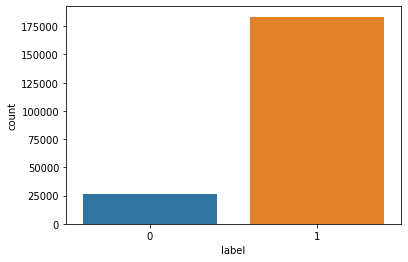

In [ ]:
# Before bevariate analysis, let's check the response variable proportion
sns.countplot(Micro_credit_ds1["label"])

As already mentioned that data is imbalance, we can see the same through this graph. we will treat the same as well before modeling building.i will applying smotetomek with up sampling to deal imbalanceness 

# Bivariate Analysis

In [ ]:
# making a function for scatte plpt

def scatter_plot(df,var1, var2):
    plt.figure(figsize =(10,5))
    sns.scatterplot(x = var1, y = var2, data = df)

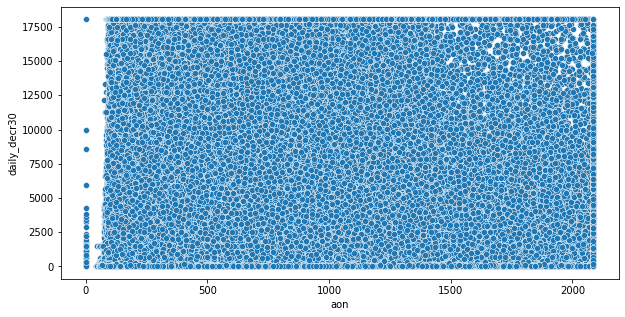

In [ ]:
# Checking relation between aon and daily average usage fo 30 and 90 days
scatter_plot(Micro_credit_ds1,"aon", "daily_decr30");

There is no relation between AON and daily decr30, now let check the  relation between daily_decr30 and 90

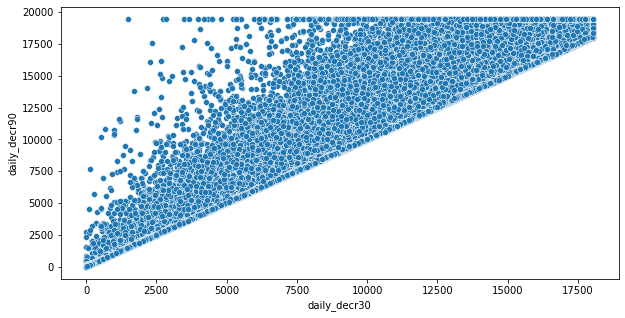

In [ ]:
scatter_plot(Micro_credit_ds1,"daily_decr30","daily_decr90");

There is clear relationship is these two featurs, person who spends high in monthly, their quarterly usage is also high

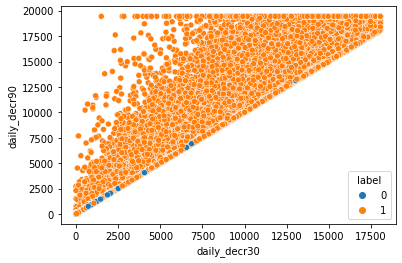

In [ ]:
# lets check how many are defualter and not defaulter in daily usage
sns.scatterplot(x = "daily_decr30",y = "daily_decr90", data = Micro_credit_ds1, hue = "label");

maximum people are non defualter, we can see through the above graph, we see 5 or 6 odd defualter points in the overall data 

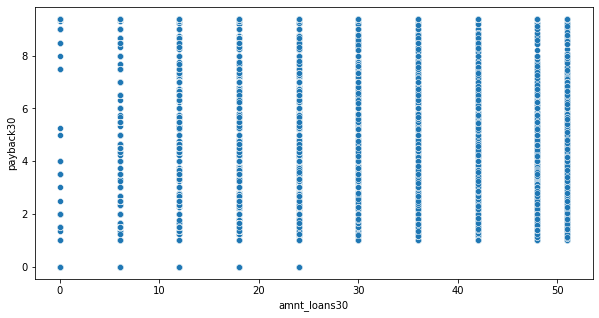

In [ ]:
scatter_plot(Micro_credit_ds1,"amnt_loans30","payback30");

cant find any corelation 

Text(0.5, 1.0, 'Month wise loan taken')

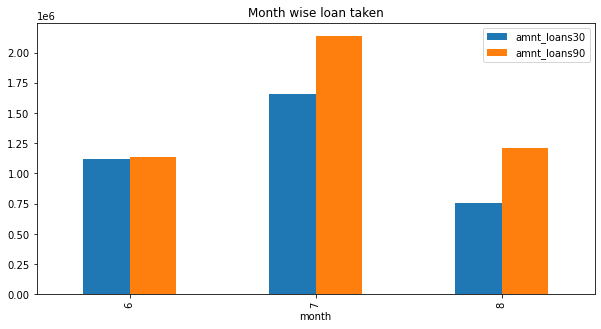

In [ ]:
data = Micro_credit_ds1.groupby("month")[["amnt_loans30","amnt_loans90"]].sum().plot(kind = "bar",figsize = (10,5))
plt.title("Month wise loan taken")

I am presenting sum of loan amount taken by the customer. we can see, in the 6th month sum of loan taken in 30 and 90 days are almost same however, in the 7th and 8th months, people have taken more loans in 90 days as compared to 30 days.
which is oblivious that people who taken month of month their sum will be high in 90 days.

Text(0.5, 1.0, 'Month wise Number of loans taken average')

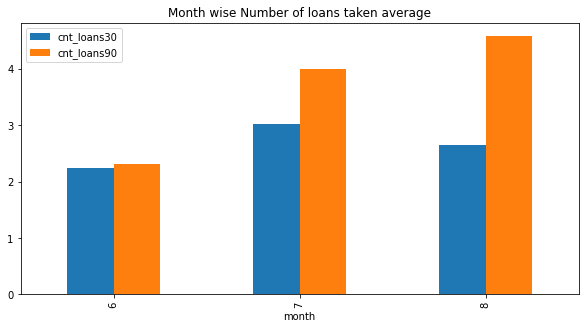

In [ ]:
# Let check the number of loan taken month wise

Micro_credit_ds1.groupby("month")[["cnt_loans30","cnt_loans90"]].mean().plot(kind = "bar", figsize = (10,5))
plt.title("Month wise Number of loans taken average")

looking at the graph, average 3 times loan were taken in 30 days but if we look at the 90days bar it seems that after 30 people take more number of time loan.

Text(0.5, 1.0, 'Month wise total main account recharge')

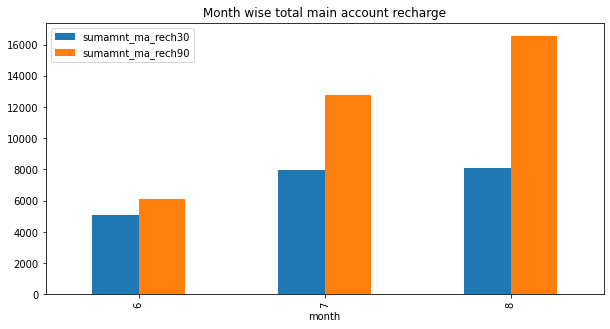

In [ ]:
# "Month wise total main account recharge
Micro_credit_ds1.groupby("month")[["sumamnt_ma_rech30","sumamnt_ma_rech90"]].mean().plot(kind = "bar", figsize = (10,5))
plt.title("Month wise total main account recharge")

As expeccted total recharge account in 90 days have been increasing however in 30 days it is similar in 7th and 8th Month. we can say that recharges have been increse which directly impact on company revenue.

Text(0.5, 1.0, 'Month wise Avereg main account balance in 30 and 90 days')

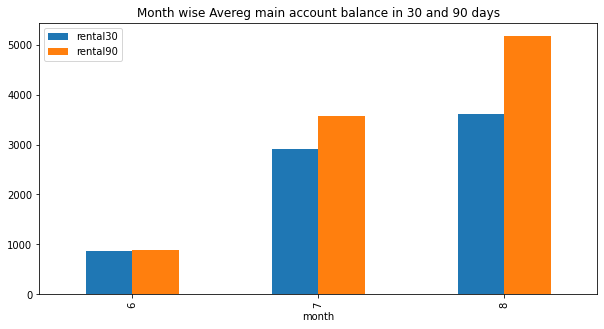

In [ ]:
# "Month wise total main account recharge
Micro_credit_ds1.groupby("month")[["rental30","rental90"]].mean().plot(kind = "bar", figsize = (10,5))
plt.title("Month wise Avereg main account balance in 30 and 90 days")

we see that people have below 1000  main account balance in 6th month however in the 7th and 8th month in 30 and 90 days main account balance it is more than 3000 and it is in increaring order. from 7th to 8th month.
may be some lucrative recharge offer would have come which people loved more.


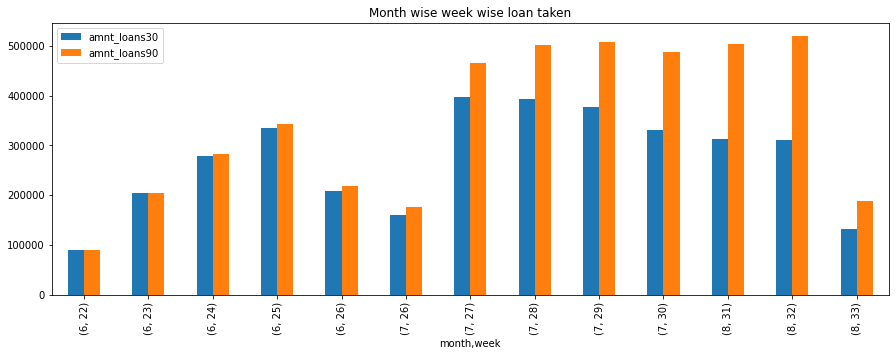

In [ ]:
data = Micro_credit_ds1.groupby(["month","week"])[["amnt_loans30","amnt_loans90"]].sum().plot(kind = "bar",figsize = (15,5))
plt.title("Month wise week wise loan taken");

1. we have got 5 weeks in 6th and 7th months however 3 months in 8th month
2. In 6th month, from week 1 to week 4 we see loan amount taken by customer has increase from 10000 to 3.5 lakh but it has dipped in week 5 to 2 lakh in 30 days and 2.2 lakh approx in 90 days
3. in 7th month, again it started with down trend but from week 2 of 7th month loan amount which took by customer increased drastically till 8th month week 2 but it has decreased in week 3 of 8th month<br><br>
The more loan is taken by the customer, the more company is benefitted.

# Let's check the skewness in the data

In [ ]:
# Before checking the skewness, let delete some unnecessary columns which are not required

Micro_credit_ds1.drop(["MSISDN","date","month","year","week"], axis= 1, inplace = True)


# checking the skewness from the data

Micro_credit_ds1.iloc[:,1:].skew()

aon                     0.960771
daily_decr30            1.240590
daily_decr90            1.240257
rental30                1.224209
rental90                1.220767
last_rech_date_ma       1.163598
last_rech_amt_ma        1.003446
cnt_ma_rech30           0.904157
fr_ma_rech30            1.253282
sumamnt_ma_rech30       1.080771
medianmarechprebal30    1.114149
medianamnt_ma_rech30    0.728219
cnt_ma_rech90           0.934789
fr_ma_rech90            1.172479
sumamnt_ma_rech90       1.126421
medianmarechprebal90    1.090368
medianamnt_ma_rech90    0.763904
cnt_loans30             1.340348
amnt_loans30            1.231090
maxamnt_loans30         0.000000
cnt_loans90             1.281861
amnt_loans90            1.217940
maxamnt_loans90         1.678304
payback30               1.189312
payback90               1.170815
dtype: float64

# Skewness correction by using SQRT, CBRT and power_transform

In [ ]:
def correct_skewness_sqrt(df,variable):
        df[variable] = np.sqrt(df[variable])
        print("skewness has been correct",variable,df[variable].skew())

In [ ]:
# Correcting skewness by using the sqrt method, have made a methoed which is taking dataset and particular feature 

correct_skewness_sqrt(Micro_credit_ds1,"aon")
correct_skewness_sqrt(Micro_credit_ds1,"last_rech_date_ma")
correct_skewness_sqrt(Micro_credit_ds1,"last_rech_amt_ma")
correct_skewness_sqrt(Micro_credit_ds1,"cnt_ma_rech30")
correct_skewness_sqrt(Micro_credit_ds1,"fr_ma_rech30")
correct_skewness_sqrt(Micro_credit_ds1,"sumamnt_ma_rech30")
correct_skewness_sqrt(Micro_credit_ds1,"medianmarechprebal30")
correct_skewness_sqrt(Micro_credit_ds1,"cnt_ma_rech90")
correct_skewness_sqrt(Micro_credit_ds1,"fr_ma_rech90")
correct_skewness_sqrt(Micro_credit_ds1,"sumamnt_ma_rech90")
correct_skewness_sqrt(Micro_credit_ds1,"payback30")
correct_skewness_sqrt(Micro_credit_ds1,"payback90")
correct_skewness_sqrt(Micro_credit_ds1,"medianmarechprebal90")
correct_skewness_sqrt(Micro_credit_ds1,"maxamnt_loans30")


skewness has been correct aon 0.34320750505022973
skewness has been correct last_rech_date_ma 0.32155149122661186
skewness has been correct last_rech_amt_ma -0.23720787631561843
skewness has been correct cnt_ma_rech30 -0.14131877176889984
skewness has been correct fr_ma_rech30 0.4081707585475609
skewness has been correct sumamnt_ma_rech30 0.08114753329098547
skewness has been correct medianmarechprebal30 0.2572773063948451
skewness has been correct cnt_ma_rech90 0.007779118994379552
skewness has been correct fr_ma_rech90 0.4510470634232964
skewness has been correct sumamnt_ma_rech90 0.21367155343914523
skewness has been correct payback30 0.4853024720161722
skewness has been correct payback90 0.3838112109448791
skewness has been correct medianmarechprebal90 0.18394217641893312
skewness has been correct maxamnt_loans30 0


In [ ]:
def correct_skewness_cbrt(df,variable):
        df[variable] = np.cbrt(df[variable])
        print("skewness has been correct",variable ,":-" ,df[variable].skew())

In [ ]:
# Correcting skewness by using the cbrt method, have made a methoed which is taking dataset and particular feature 
correct_skewness_cbrt(Micro_credit_ds1,"daily_decr30")
correct_skewness_cbrt(Micro_credit_ds1,"daily_decr90")
correct_skewness_cbrt(Micro_credit_ds1,"rental30")
correct_skewness_cbrt(Micro_credit_ds1,"rental90")
correct_skewness_cbrt(Micro_credit_ds1,"cnt_loans30")
correct_skewness_cbrt(Micro_credit_ds1,"amnt_loans30")
correct_skewness_cbrt(Micro_credit_ds1,"cnt_loans90")
correct_skewness_cbrt(Micro_credit_ds1,"amnt_loans90")
correct_skewness_cbrt(Micro_credit_ds1,"maxamnt_loans90")

skewness has been correct daily_decr30 :- 0.26262524205007326
skewness has been correct daily_decr90 :- 0.2867980854178811
skewness has been correct rental30 :- 0.07508346267169094
skewness has been correct rental90 :- 0.10078968263045879
skewness has been correct cnt_loans30 :- -0.07812688294080315
skewness has been correct amnt_loans30 :- -0.11152322777072135
skewness has been correct cnt_loans90 :- 0.28827222144060616
skewness has been correct amnt_loans90 :- 0.2413630919078882
skewness has been correct maxamnt_loans90 :- -3.6987960398673314


In [ ]:
# There are 3 columns which are not getting corrected by using sqrt and cbrt,thus applied power_transform to correct them
trasnform_with_power = Micro_credit_ds1[["medianamnt_ma_rech30","medianamnt_ma_rech90","maxamnt_loans90"]]

In [ ]:


pt = PowerTransformer() # instance creation
# power transform return array thus after computation when we will convert array into df , i need features name there

trasnform_with_col = trasnform_with_power.columns 

trasnform_with_power  =  pt.fit_transform(trasnform_with_power) # applying power transform

trasnform_with_power = pd.DataFrame(trasnform_with_power) # changing it into df

trasnform_with_power.columns = trasnform_with_col # assigning names

trasnform_with_power.skew() # checking the skewness again

medianamnt_ma_rech30   -0.555924
medianamnt_ma_rech90   -0.430848
maxamnt_loans90         0.672788
dtype: float64

In [ ]:
# dropping columns and inserting corrected one in the dataset

# medianamnt_ma_rech30
Micro_credit_ds1.drop("medianamnt_ma_rech30",axis = 1, inplace = True)
Micro_credit_ds1.insert(12,"medianamnt_ma_rech30",trasnform_with_power["medianamnt_ma_rech30"])

# medianamnt_ma_rech90
Micro_credit_ds1.drop("medianamnt_ma_rech90",axis = 1, inplace = True)
Micro_credit_ds1.insert(17,"medianamnt_ma_rech90",trasnform_with_power["medianamnt_ma_rech90"])

# maxamnt_loans90
Micro_credit_ds1.drop("maxamnt_loans90",axis = 1, inplace = True)
Micro_credit_ds1.insert(23,"maxamnt_loans90",trasnform_with_power["maxamnt_loans90"])

All the Columns were too much skewed, some of them are corrected by using srqt and some of them are corrected by using cbrt method.
i could not try logarithm method because columns have 0 values and log 0 = 0 so it wasnt useful. i tried log1p but it also could not correct the skewness from the features. finally have tried power_transform and we could correct them.<br><br>

Note :-  one features "maxamnt_loans90" has a slightly skewness. rest are all correct, we will non parametric ML algorothm.



# Correlation plot

In [ ]:
Micro_credit_ds1.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianmarechprebal30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianmarechprebal90,medianamnt_ma_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,2.095930e+05,209593.000000,209593.000000,209593.000000,209593.000000,2.095930e+05,209593.000000,209593.000000,2.095930e+05,209593.000000,209593.000000,2.095930e+05,209593.000000,209593.000000
mean,0.875177,24.031775,11.982422,12.239948,10.891077,11.698002,1.896754,37.362635,1.671475,1.395157,70.596056,6.346506,9.989576e-16,2.090029,1.750671,89.098706,6.419846,-3.878600e-17,1.290246,2.391020,2.449490e+00,1.390558,2.558258,-3.571232e-15,1.016530,1.191969
std,0.330519,9.745890,8.503192,8.793938,5.346596,5.844686,1.143313,17.976212,0.943003,1.313615,43.327563,4.350274,1.000002e+00,1.158200,1.575643,54.223196,3.961368,1.000002e+00,0.358523,0.670675,1.116843e-11,0.420792,0.771615,1.000002e+00,1.125366,1.213823
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.007066e+00,0.000000,0.000000,0.000000,0.000000,-2.158066e+00,0.000000,0.000000,2.449490e+00,0.000000,0.000000,-4.668398e+00,0.000000,0.000000
25%,1.000000,15.874508,3.570018,3.577639,6.910284,7.243982,1.000000,27.748874,1.000000,0.000000,39.242834,3.416138,-3.933498e-01,1.414214,0.000000,48.135226,3.911521,-5.121030e-01,1.000000,1.817121,2.449490e+00,1.000000,1.817121,-2.955552e-01,0.000000,0.000000
50%,1.000000,22.956481,11.368188,11.447142,10.271148,11.008258,1.732051,39.230090,1.732051,1.414214,68.029405,5.822371,2.834045e-01,2.000000,1.414214,85.005882,6.000000,2.202359e-01,1.259921,2.289428,2.449490e+00,1.259921,2.289428,-2.955552e-01,0.000000,1.290994
75%,1.000000,31.336879,19.349043,19.834289,14.973197,16.136578,2.645751,48.052055,2.236068,2.449490,100.049988,9.110434,5.553172e-01,2.828427,2.828427,126.491106,8.905616,5.199564e-01,1.587401,2.884499,2.449490e+00,1.709976,3.107233,-2.955552e-01,1.936492,2.121320
max,1.000000,45.672749,26.229885,26.889783,19.976406,21.583118,4.000000,67.952189,3.316625,3.872983,150.714963,13.820275,1.524702e+00,4.123106,4.472136,191.113840,13.280625,1.601103e+00,2.040828,3.708430,2.449490e+00,2.223980,4.041240,2.368606e+00,3.061862,3.354102


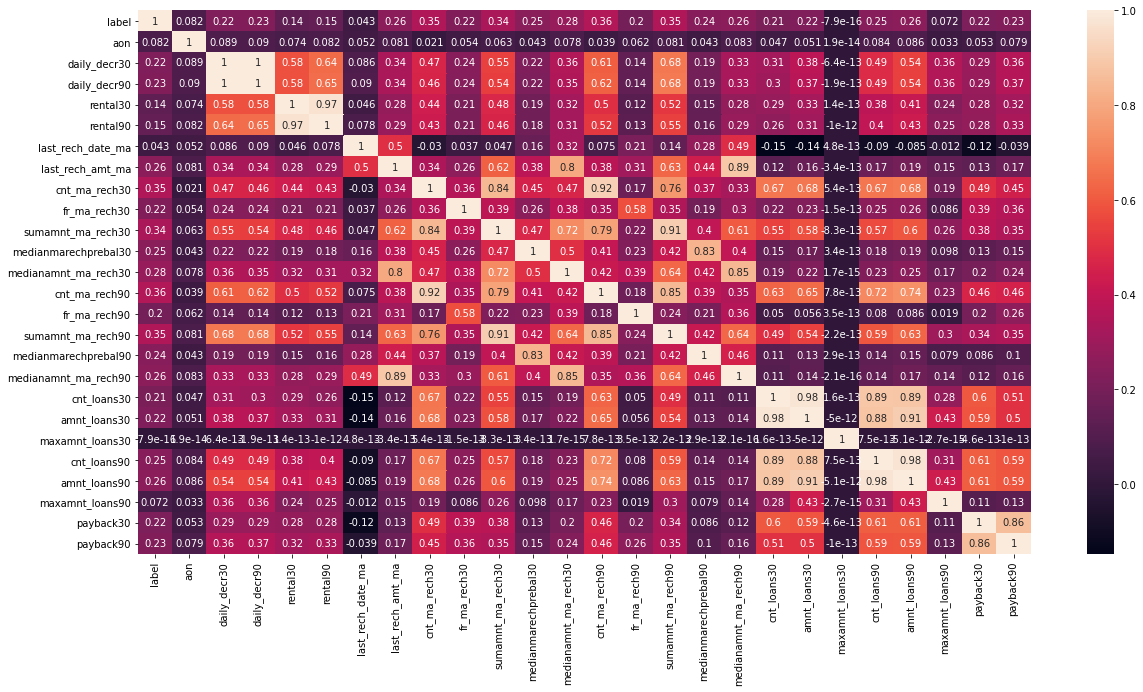

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(Micro_credit_ds1.corr(),annot =True)

i am going to delete columns which are not correaled with lebel columns, we will drop them and they are:-<br>
aon<br>
last_rech_date_ma<br>
maxamnt_loans30<br>
maxamnt_loans90<br>

In [ ]:
Micro_credit_ds1.drop(["aon","last_rech_date_ma","maxamnt_loans30","maxamnt_loans90"],axis = 1, inplace = True)

In [ ]:
Micro_credit_ds1.shape

(209593, 22)

we have perform all the necessary action to make the data clarn, i have also delete some not relation features from the dataset. dataset is ready to perform machine leanring task. 

# Handling Imbalance dataset

In [ ]:
# I will use smotetomek method to handle the imbalance problem by upsampling it but before that i will seprate the data into X and y

X = Micro_credit_ds1.drop("label",axis = 1)
y = Micro_credit_ds1["label"]


In [ ]:
# using smote to upsample data

smote = SMOTETomek()

resam_X, resam_y =  smote.fit_sample(X,y)  
print("resam_X",resam_X.shape)
print("resam_y",resam_y.shape)

resam_X (361260, 21)
resam_y (361260,)


In [ ]:
# creating train and test data 
X_train, X_test,y_train,y_test = train_test_split(resam_X,resam_y,test_size = .30, random_state = 121)

# training model
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
print("Accuracy",accuracy_score(y_test,pred))
print("ROC_AUC_SCORE",roc_auc_score(y_test,pred))
print("Classification report","\n",classification_report(y_test,pred))
print("Confusion Matric","\n",confusion_matrix(y_test,pred))

Accuracy 0.9413534112089169
ROC_AUC_SCORE 0.9413594538189032
Classification report 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94     54253
           1       0.94      0.95      0.94     54125

    accuracy                           0.94    108378
   macro avg       0.94      0.94      0.94    108378
weighted avg       0.94      0.94      0.94    108378

Confusion Matric 
 [[50794  3459]
 [ 2897 51228]]


In [ ]:
Adb = AdaBoostClassifier()
Adb.fit(X_train,y_train)
pred = Adb.predict(X_test)
print("Accuracy",accuracy_score(y_test,pred))
print("ROC_AUC_SCORE",roc_auc_score(y_test,pred))
print("Classification report","\n",classification_report(y_test,pred))
print("Confusion Matric","\n",confusion_matrix(y_test,pred))

Accuracy 0.8377345955821293
ROC_AUC_SCORE 0.8376991919945338
Classification report 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84     54253
           1       0.86      0.81      0.83     54125

    accuracy                           0.84    108378
   macro avg       0.84      0.84      0.84    108378
weighted avg       0.84      0.84      0.84    108378

Confusion Matric 
 [[47074  7179]
 [10407 43718]]


In [ ]:
# checking with DecisionTreeclassifier()

DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
pred = DT.predict(X_test)
print("Accuracy",accuracy_score(y_test,pred))
print("ROC_AUC_SCORE",roc_auc_score(y_test,pred))
print("Classification report","\n",classification_report(y_test,pred))
print("Confusion Matric","\n",confusion_matrix(y_test,pred))

Accuracy 0.9018066397239292
ROC_AUC_SCORE 0.9017935564828016
Classification report 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     54253
           1       0.91      0.89      0.90     54125

    accuracy                           0.90    108378
   macro avg       0.90      0.90      0.90    108378
weighted avg       0.90      0.90      0.90    108378

Confusion Matric 
 [[49526  4727]
 [ 5915 48210]]


In [ ]:
# LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
pred = LR.predict(X_test)
print("Accuracy",accuracy_score(y_test,pred))
print("ROC_AUC_SCORE",roc_auc_score(y_test,pred))
print("Classification report","\n",classification_report(y_test,pred))
print("Confusion Matric","\n",confusion_matrix(y_test,pred))

Accuracy 0.7587148683312112
ROC_AUC_SCORE 0.7587179535925878
Classification report 
               precision    recall  f1-score   support

           0       0.76      0.76      0.76     54253
           1       0.76      0.76      0.76     54125

    accuracy                           0.76    108378
   macro avg       0.76      0.76      0.76    108378
weighted avg       0.76      0.76      0.76    108378

Confusion Matric 
 [[41021 13232]
 [12918 41207]]


I have run multiple models and trained data on them. I have found Randomforest is performing best out of them.All the factors like f1score, precision are above 90%. model explain 94% data is being explained by Randomforest algorithm. further, I will apply randomized search CV for find the best parameter and then i will use grid search CV   

In [ ]:
# Appying Randomized CV to find the best parameters
RF = RandomForestClassifier()
para = {"n_estimators":[100,200,300] ,"criterion" :["gini","entropy"], "max_depth" :[2,3,4,5,7,9],"max_features" :['auto','sqrt'],"min_samples_split":[2,3,4,6,7,8]}

random_search = RandomizedSearchCV(RF,para,cv = 8,n_jobs=-1, verbose =2  )
random_search.fit(X_train,y_train)
print(random_search.best_params_)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 55.5min finished


{'n_estimators': 100, 'min_samples_split': 7, 'max_features': 'auto', 'max_depth': 9, 'criterion': 'entropy'}


# Grid Search CV

In [ ]:
best_RF = RandomForestClassifier(n_estimators=100,min_samples_split=7,max_features="auto",max_depth = 9,criterion="entropy")

for i in range(2,11):
  cross_validation = cross_val_score(best_RF,resam_X,resam_y,cv = i)
  print("iteration",i,"Mean is ",cross_validation.mean() ,"and std deviation ",cross_validation.std())

iteration 2 Mean is  0.8672977910646071 and std deviation  0.016796766871505275
iteration 3 Mean is  0.8685572717710236 and std deviation  0.026587841822619817
iteration 4 Mean is  0.8678043514366385 and std deviation  0.03199065880785767
iteration 5 Mean is  0.8683884183136799 and std deviation  0.03756199835780719
iteration 6 Mean is  0.8689697171012566 and std deviation  0.0420651513055947
iteration 7 Mean is  0.868684765802565 and std deviation  0.045886955585090976
iteration 8 Mean is  0.8686045396524522 and std deviation  0.043315006522505035
iteration 9 Mean is  0.868634778276034 and std deviation  0.04125630074077521
iteration 10 Mean is  0.8687814870176604 and std deviation  0.0407284839228656


I have complete the projects, we selected Randomforest as the best algorithm for model, we performed RandomizedsearchCV and cross_validation, model is able to explain approx 87% correct prediction